In [26]:
import torch
from pretrain.YOLO_Feature import YOLO_Feature

In [27]:
yolo_feature = YOLO_Feature()
pretrain_dict = torch.load('weights/YOLO_Feature_40.pth', map_location='cpu')

In [28]:
yolo_feature.load_state_dict(pretrain_dict['model'])


<All keys matched successfully>

In [29]:
from data_process.COCO_DataSet import *

train_dataSet = coco_classify_dataset(imgs_path='../data/coco2017/Train/Imgs',txts_path='../data/coco2017/Train/Labels', is_train=True, edge_threshold=200)

In [34]:
train_iter = torch.utils.data.DataLoader(train_dataSet, batch_size=8, shuffle=True, num_workers=4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


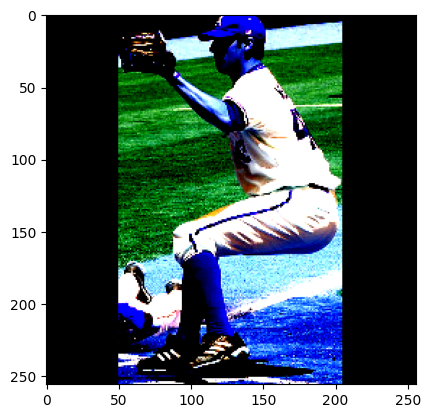

tensor(0)
tensor(0)


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display

# 展示图片
def show_img(img):
    img = img.numpy()
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()

for i, (imgs, labels) in enumerate(train_iter):
    if i == 0:
        show_img(imgs[0])
        print(labels[0])
        y = yolo_feature(imgs)
        predict = y.argmax(dim=1)
        print(predict[0])
        
        break
